In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q qiskit-aer

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import Aer, execute, BasicAer
import numpy as np
from numpy import sqrt

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


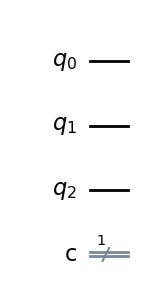

In [ ]:
# Creating the Teleportation Circuit
TPC = QuantumCircuit(3,1)
TPC.draw('mpl')

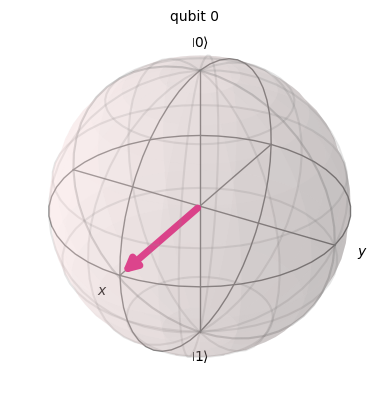

In [ ]:
ket_zero = np.array([1,0])
ket_one = np.array([0,1])
ket_plus = 1/sqrt(2)*(ket_zero + ket_one)
plot_bloch_multivector(ket_plus)

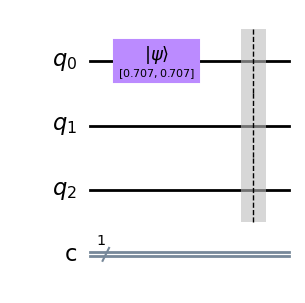

In [ ]:
TPC.initialize(ket_plus,0)
TPC.barrier() ## Putting barrier
TPC.draw('mpl')

In [ ]:
# Creating a Function the draw the circuit whenever needed
def DC():
  return TPC.draw('mpl')

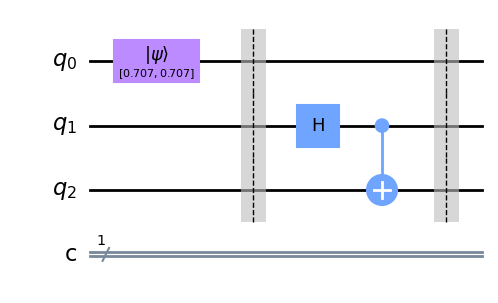

In [ ]:
TPC.h(1)
TPC.cx(1,2)
TPC.barrier()
DC()

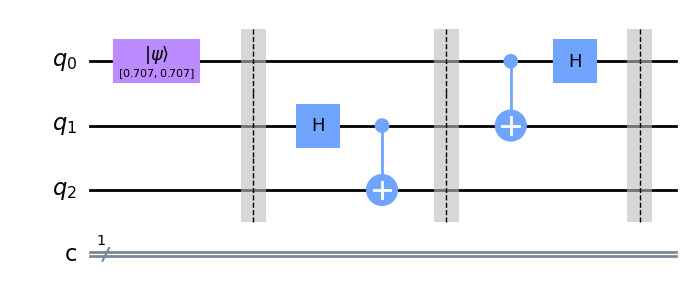

In [ ]:
TPC.cx(0,1)
TPC.h(0)
TPC.barrier()
DC()

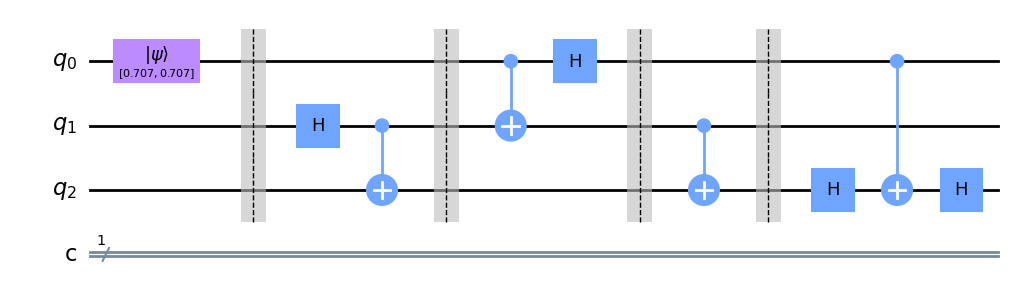

In [ ]:
TPC.cx(1,2)
TPC.barrier()
TPC.h(2)
TPC.cx(0,2)
TPC.h(2)
DC()

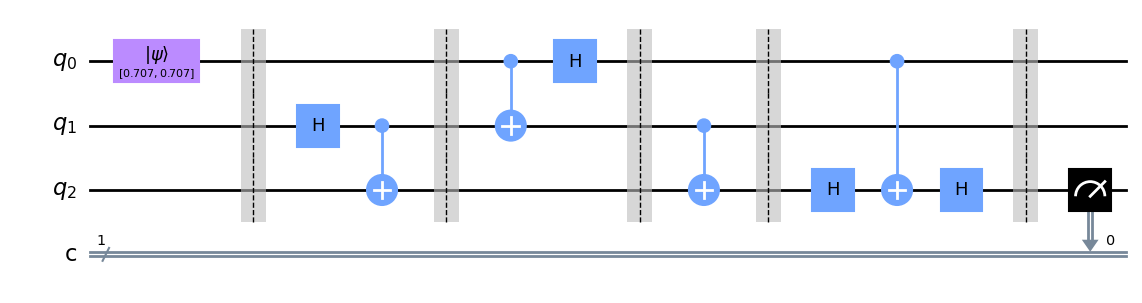

In [ ]:
## Adding measurement
TPC.barrier()
TPC.measure(2,0)
DC()

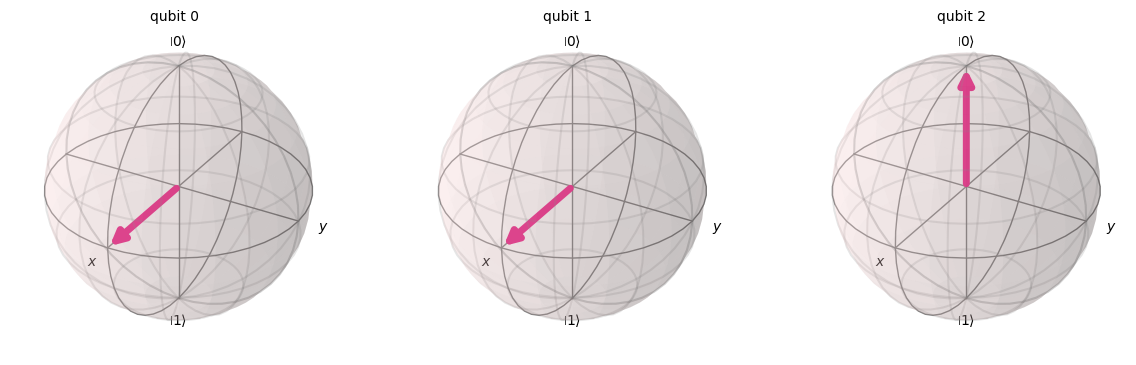

In [ ]:
backend = Aer.get_backend('statevector_simulator')
backend_results_state = execute(TPC,backend).result().get_statevector()
plot_bloch_multivector(backend_results_state)

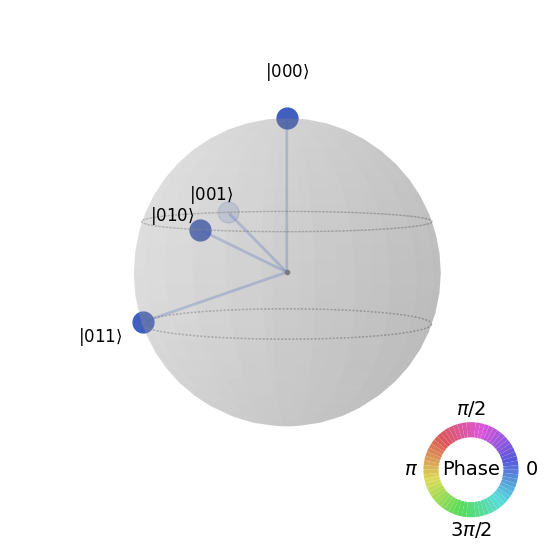

In [ ]:
plot_state_qsphere(backend_results_state)

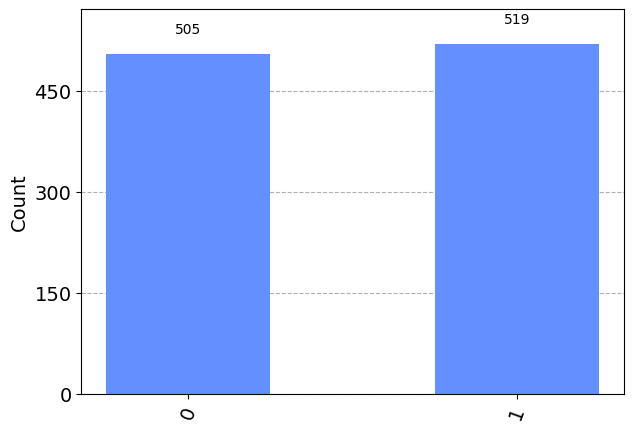

In [ ]:
backend2 = Aer.get_backend('qasm_simulator')
backend_results_count = execute(TPC,backend,shots=1024).result().get_counts()
plot_histogram(backend_results_count)

## DJ Algorithm


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


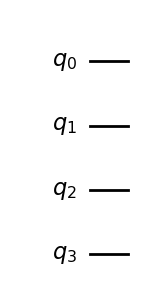

In [ ]:
n =3
forallx = QuantumCircuit(n+1)
forallx.draw('mpl')

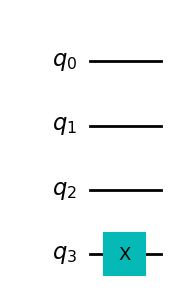

In [ ]:
forallx = QuantumCircuit(n+1)
forallx.x(n)
forallx.draw('mpl')

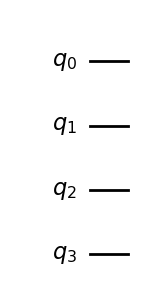

In [ ]:
forhalf= QuantumCircuit(n+1)
xgates = '101'
# cgates = '101'
forhalf.draw('mpl')

In [ ]:
cxgates = '101'

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


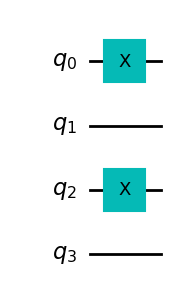

In [ ]:
for i in range(n):
  if xgates[i] == '1':
    ind = [i]
    forhalf.x(ind)

forhalf.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


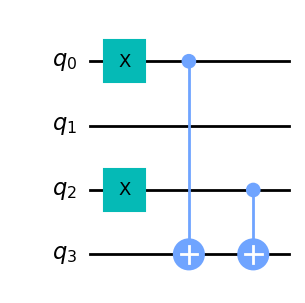

In [ ]:
for m in range(n):
  if cxgates[m] == '1':
    forhalf.cx(m,n)
forhalf.draw('mpl')

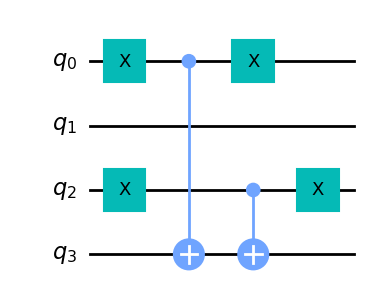

In [ ]:
for i in range(n):
  if xgates[i] == '1':
    ind = [i]
    forhalf.x(ind)

forhalf.draw('mpl')

In [ ]:
DJC = QuantumCircuit(n+1,n)

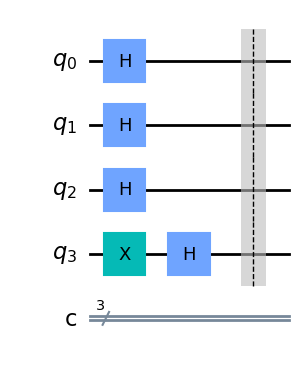

In [ ]:
for qubit in range(n):
  DJC.h(qubit)
DJC.x(n)
DJC.h(n)
DJC.barrier()
DJC.draw('mpl')

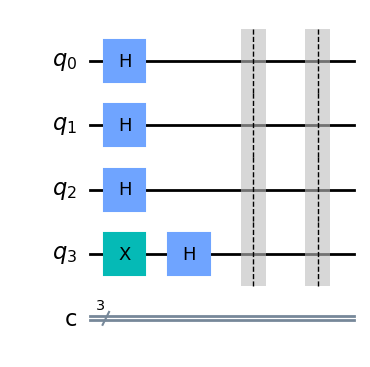

In [ ]:
DJC.barrier()
DJC.draw('mpl')

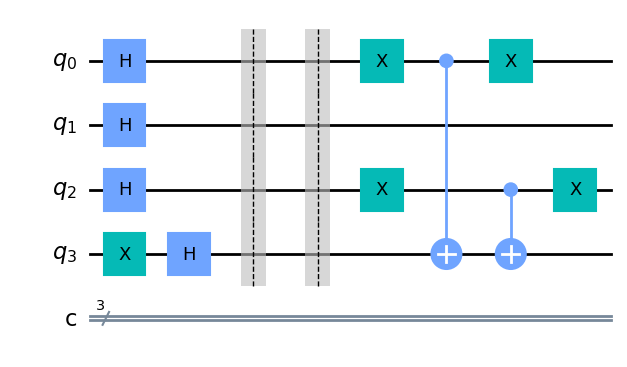

In [ ]:
DJC = DJC.compose(forhalf)
DJC.barrier
DJC.draw('mpl')

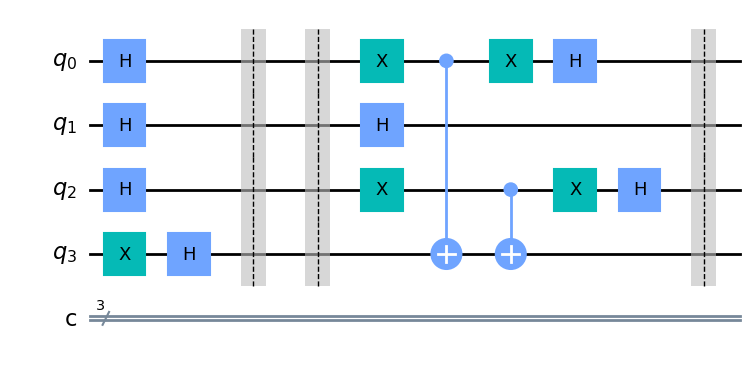

In [ ]:
for qubit in range(n):
  DJC.h(qubit)
DJC.barrier()
DJC.draw('mpl')

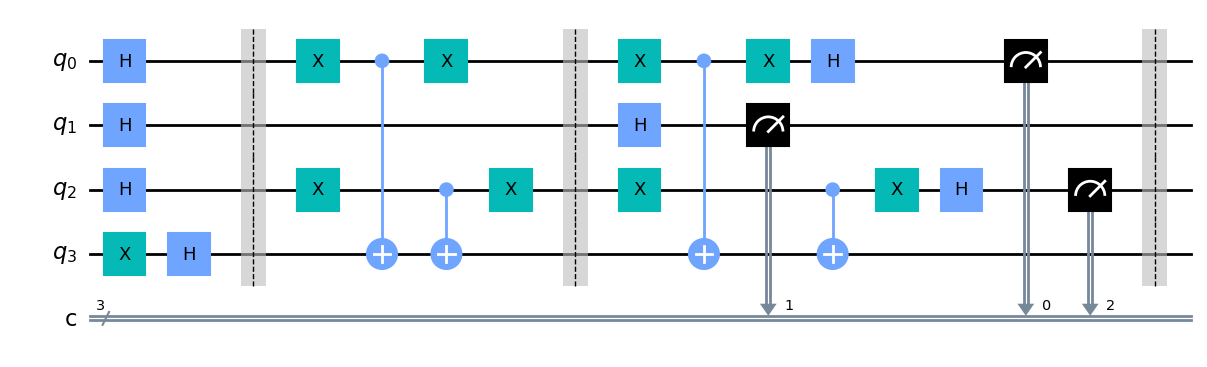

In [ ]:
for i in range(n):
  DJC.measure(i,i)
DJC.barrier()
DJC.draw('mpl')

In [ ]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
# pip install qiskit-aer

In [ ]:
backend = Aer.get_backend('statevector_simulator')
# backend = BasicAer.get_backend('qasm_simulator')

In [ ]:
backend_results_state = execute(DJC,backend).result().get_statevector()

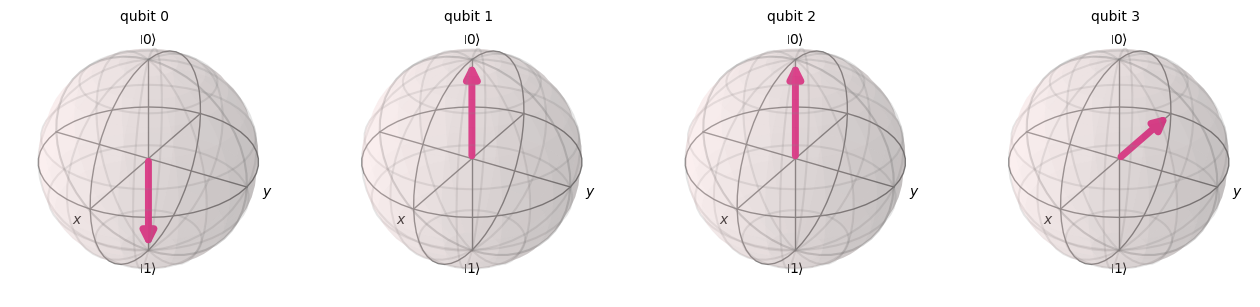

In [ ]:
plot_bloch_multivector(backend_results_state)

In [ ]:
backend_results_count = execute(DJC,backend,shots=1024).result().get_counts()

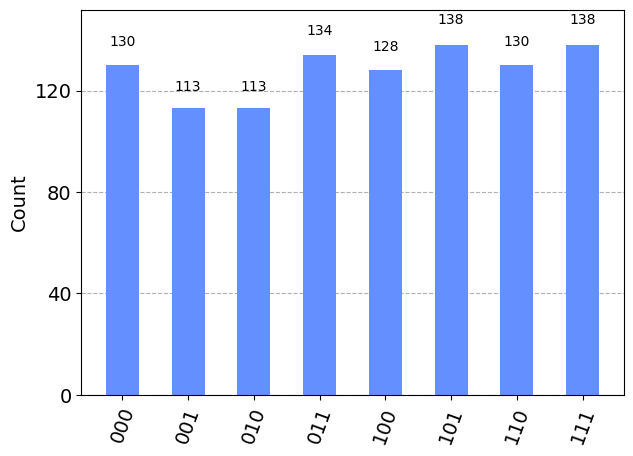

In [ ]:
plot_histogram(backend_results_count)